# 导入数据集

In [1]:
from ucimlrepo import fetch_ucirepo 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
# metadata 
print(iris.metadata) 
# variable information 
print(iris.variables) 

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [2]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# DBSCAN类
导入自己用python实现的DBSCAN类。

In [4]:
import numpy as np  # 导入numpy库，用于矩阵运算和处理
import matplotlib.pyplot as plt

class DBSCAN:
    # 初始化函数，设置eps邻域半径和minPts最小点数
    def __init__(self, eps, min_pts):
        self.eps = eps  # 邻域半径，两个点成为邻居的最大距离
        self.min_pts = min_pts  # 一个点成为“核心点”所需的最小邻居数目

    # 主函数，用于拟合数据并预测每个点的聚类标签
    def fit_predict(self, X):
        labels = [0] * len(X)  # 初始化所有点的标签为0
        cluster_id = 0  # 初始化聚类ID

        # 对每个点进行迭代
        for i in range(len(X)):
            if labels[i] != 0:  # 如果点已经被标记，则跳过
                continue

            # 获取点i的邻域点
            neighbors = self.region_query(X, i)
            if len(neighbors) < self.min_pts:  # 如果邻域点数少于minPts，则为噪声点
                labels[i] = -1  # 标记为-1
            else:  # 否则，将该点作为新聚类的核心点
                cluster_id += 1  # 聚类ID自增
                self.expand_cluster(X, labels, i, neighbors, cluster_id)  # 扩展该核心点的聚类

        return labels  # 返回所有点的聚类标签

    # 递归函数，用于扩展以核心点为核心的聚类
    def expand_cluster(self, X, labels, core_idx, neighbors, cluster_id):
        labels[core_idx] = cluster_id  # 将核心点标记为当前聚类ID

        i = 0  # 初始化索引
        # 当存在待处理的邻居点时
        while i < len(neighbors):
            idx = neighbors[i]  # 取出当前邻居点的索引
            if labels[idx] == -1:  # 如果邻居是噪声点，则将其标记为当前聚类ID
                labels[idx] = cluster_id
            elif labels[idx] == 0:  # 如果邻居尚未分配到任何聚类
                labels[idx] = cluster_id  # 将其标记为当前聚类ID
                new_neighbors = self.region_query(X, idx)  # 获取邻居点的邻域点
                if len(new_neighbors) >= self.min_pts:  # 如果邻居点的邻域点数足够
                    neighbors.extend(new_neighbors)  # 将这些邻域点添加到待处理列表
            i += 1  # 移动到下一个邻居点

    # 寻找给定点的邻域点
    def region_query(self, X, idx):
        neighbors = []  # 初始化邻域点列表
        for i in range(len(X)):  # 遍历所有点
            if np.linalg.norm(X[idx] - X[i]) < self.eps:  # 如果两点之间的欧氏距离小于eps
                neighbors.append(i)  # 将点i添加到邻域点列表
        return neighbors  # 返回邻域点列表

In [ ]:
# 选择需要的列
selected_columns = ['sepal width', 'petal width']
selected_data = X[selected_columns]

# 转换为 NumPy 数组
X = selected_data.values

In [125]:
# 初始化 DBSCAN 模型
dbscan = DBSCAN(eps=0.143, min_pts=4)

# 拟合数据并预测聚类标签
labels = dbscan.fit_predict(X)

In [126]:
# 打印聚类结果
print("Cluster labels:", labels)

Cluster labels: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -1, -1, 1, 1, 1, 1, 1, 1, 1, -1, 1, -1, 1, 1, 1, 1, 1, 1, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, -1, 2, -1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 3, 2, 3, 3, -1, 2, -1, -1, 3, 2, 3, -1, -1, 3, 2, -1, -1, -1, 3, 2, 2, 2, -1, 2, 2, 2, 2, 2, 2, -1, 2, 2, 2, 3, 4, 2, 2, 3, 3, 3, 2, 3, 4, 3, -1, 3, 4, 2]


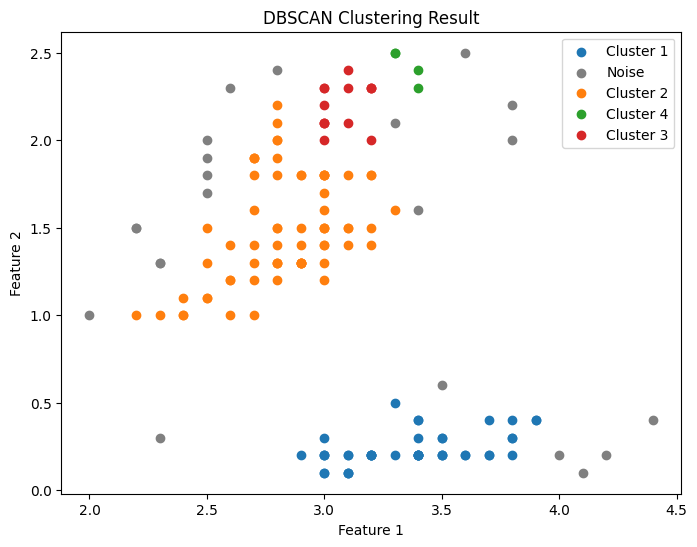

In [127]:
# 提取每个聚类的点
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(X[i])

# 绘制聚类结果
plt.figure(figsize=(8, 6))
for label, points in clusters.items():
    if label == -1:
        plt.scatter([p[0] for p in points], [p[1] for p in points], c='gray', label='Noise')
    else:
        plt.scatter([p[0] for p in points], [p[1] for p in points], label=f'Cluster {label}')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('DBSCAN Clustering Result')
plt.legend()
plt.show()

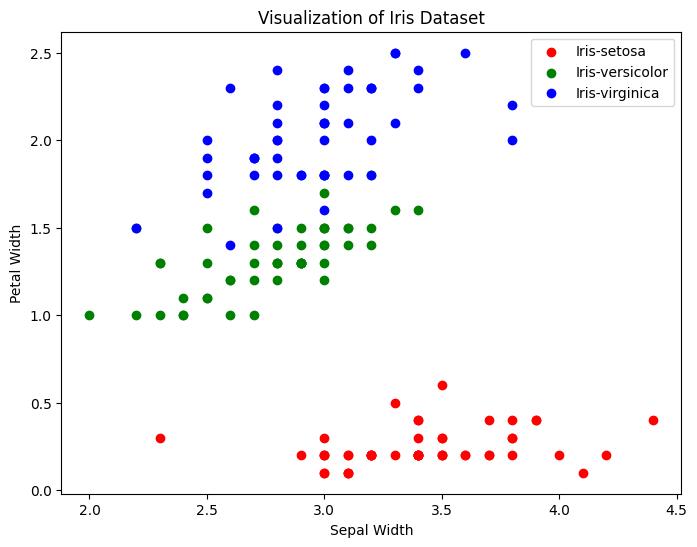

In [73]:
import matplotlib.pyplot as plt
import numpy as np

# 定义类别和对应的颜色
class_names = np.unique(y)
colors = ['r', 'g', 'b']

# 创建散点图
plt.figure(figsize=(8, 6))
for i, class_name in enumerate(class_names):
    class_indices = np.where(y == class_name)[0]
    plt.scatter(X[class_indices, 0], X[class_indices, 1], c=colors[i], label=class_name)

plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.title('Visualization of Iris Dataset')
plt.legend()
plt.show()
